### Task 3 To Explore Unsupervised Machine Learning

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


In [19]:
#import library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Import iris dataset
df = pd.read_csv("/content/sample_data/Task_3_Iris.csv")

In [86]:
df.size
df.shape
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [24]:
#check the null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [25]:
X= df.drop('Species',axis=1)
y = df['Species']


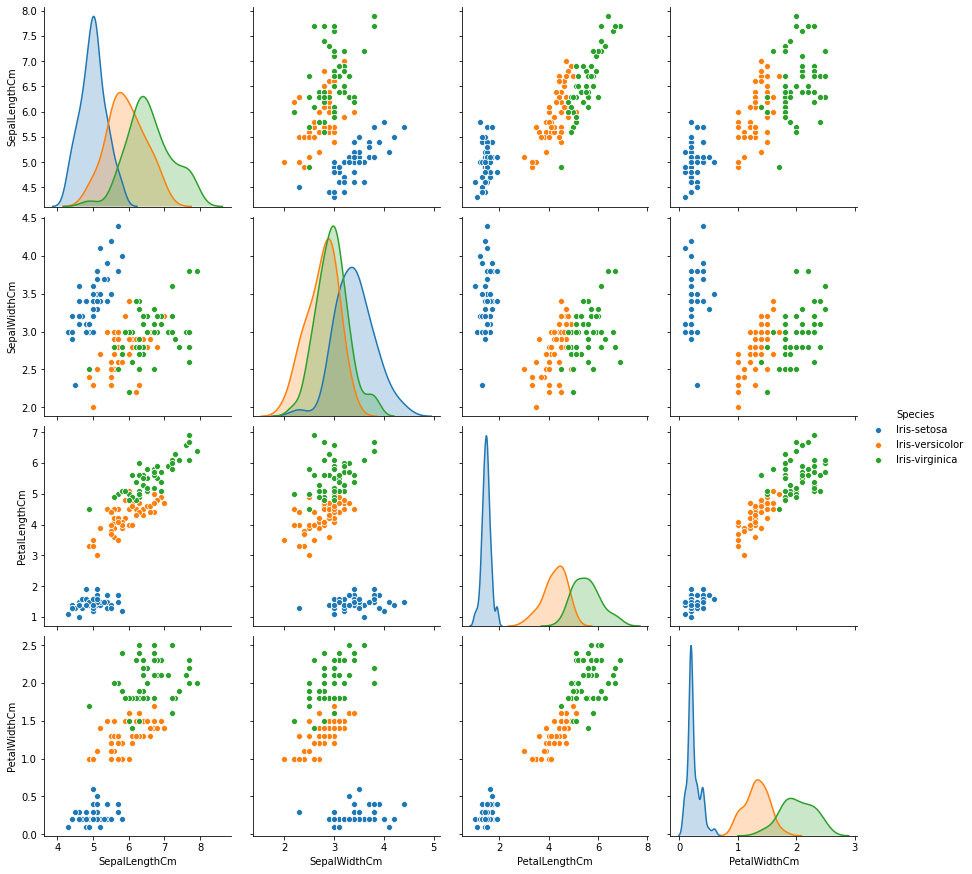

In [84]:
#plotting pairplot
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3, diag_kind="kde")

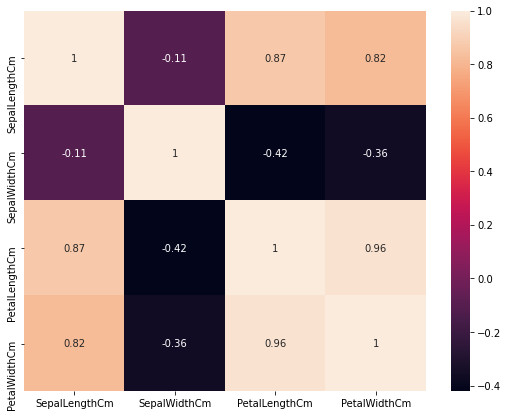

In [85]:
#Plotting correlation matrix
df.drop('Id',axis=1,inplace=True)
correlations = df.corr()
f , ax = plt.subplots(figsize = (9,7))
sns.heatmap(correlations , annot = True)

## K-means algorithm


In [26]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans


In [27]:
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',max_iter=300,random_state=0).fit(X)
    
    wcss.append(kmeans.inertia_)
    
len(wcss)
print(wcss)

[281918.32440000004, 70616.29893333334, 31326.8868, 17783.299992887627, 11441.95518464961, 7914.494103846153, 5892.550129870129, 4576.180407882452, 3579.4359272875818, 2978.573177844215]


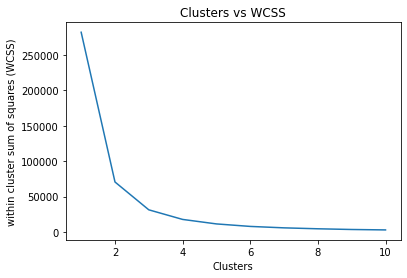

In [28]:
# Plot the results onto a line graph.
#This is called as 'The elbow method'.
plt.plot(range(1, 11), wcss)
plt.title('Clusters vs WCSS')
plt.xlabel('Clusters')
plt.ylabel('within cluster sum of squares (WCSS)')
plt.show()

In [29]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

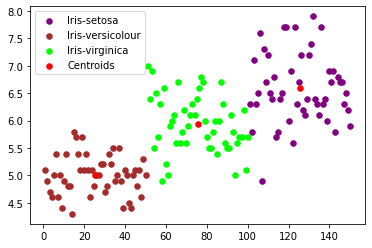

In [76]:
# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 30, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 30, c = 'brown', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 30, c = 'lime', label = 'Iris-virginica')
# Plotting the centroids of the clustersnta
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 30, c = 'red', label = 'Centroids')

plt.legend()

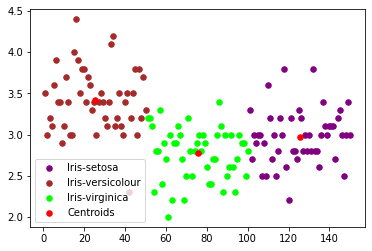

In [77]:
# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], s = 30, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], s = 30, c = 'brown', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 30, c = 'lime', label = 'Iris-virginica')
# Plotting the centroids of the clustersnta
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2],s = 30, c = 'red', label = 'Centroids')

plt.legend()

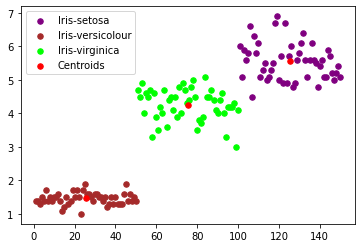

In [78]:
# Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 3], s = 30, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 3], s = 30, c = 'brown', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 3], s = 30, c = 'lime', label = 'Iris-virginica')
# Plotting the centroids of the clustersnta
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3],s = 30, c = 'red', label = 'Centroids')

plt.legend()